In [1]:
import os
from glob import glob
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.datasets import AirPassengersDataset
%cd ..
%ls

/home/mahdigilany/offline_codes/codes/ts_snr
configs/     logs/    notebooks/  README.md         scripts/     src/
darts_logs/  main.py  OLD/        requirements.txt  slurm_logs/  wandb/


In [61]:
from src.data.registry.data_registry import create_dataset
data_series = create_dataset('etth2') # TimeSeries class object

In [62]:
train_series, val_series, test_series, scaler = data_series.train_series, data_series.val_series, data_series.test_series, data_series.scaler

In [ ]:
from darts.utils.statistics import plot_acf, check_seasonality
plot_acf(train_series, m=96, alpha=0.05, max_lag=96*7)
for m in range(2, 98):
    is_seasonal, period = check_seasonality(train_series, m=m, alpha=0.05, max_lag=100)
    if is_seasonal:
        print("There is seasonality of order {}.".format(period))

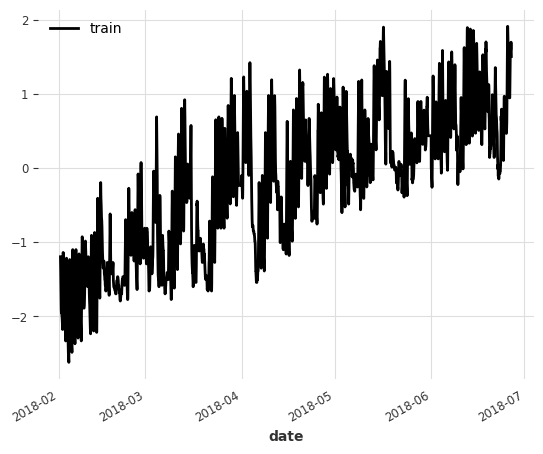

In [65]:
train_series = train_series[train_series.components[-1]]
val_series = val_series[val_series.components[-1]]
test_series = test_series[test_series.components[-1]]
test_series.plot(label='train')

In [66]:
from darts.models import NaiveSeasonal, NaiveDrift, NaiveEnsembleModel, RegressionEnsembleModel
from darts.timeseries import concatenate
seasonality = 96
model_seasonality = NaiveSeasonal(K=seasonality)
model_drift = NaiveDrift()
model = NaiveEnsembleModel([model_drift, model_seasonality, ])
# model = RegressionEnsembleModel([model_seasonality, model_drift], regression_train_n_points=seasonality)
train_val_series = concatenate([train_series, val_series])
model.fit(train_series)

NaiveEnsembleModel(models=[NaiveDrift(), NaiveSeasonal(K=96)])

In [28]:
from src.modeling.registry.ts_model_registry import naive
seasonality = 96
model = naive(input_chunk_length=seasonality)
model.fit(train_series)

RegressionEnsembleModel(forecasting_models=[NaiveSeasonal(K=96), NaiveDrift()], regression_model=None, regression_train_n_points=96)

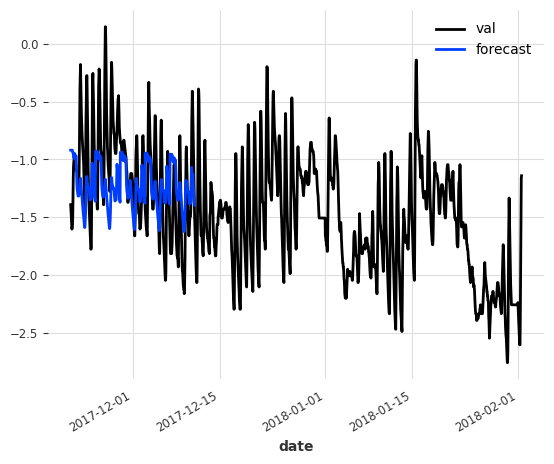

In [70]:
forecast = model.predict(n=seasonality*5)
# train_series.plot(label='train')
val_series.plot(label='val')
# test_series.plot(label='test')
forecast.plot(label='forecast')

In [ ]:
from darts.models import ARIMA, AutoARIMA